<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/025___Histograms_And_Box_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 2/6: EXPLORATORY DATA VISUALIZATION

# MISSION 4: Histograms And Box Plots

In this mission, we will learn how to visualize the distributions of user ratings using histograms and box plots.

## 1. Introduction

In the last mission, we learned how to create bar plots to compare the average user rating a movie received from four movie review sites. We also learned how to create scatter plots to explore how ratings on one site compare with ratings on another site. We ended the mission with the observations that user ratings from Metacritic and Rotten Tomatoes spanned a larger range (1.0 to 5.0) while those from Fandango and IMDB spanned a smaller range (2.5 to 5 and 2 to 5 respectively).

In this mission, we'll learn how to visualize the distributions of user ratings using histograms and box plots. We'll continue working with the same dataset from the last mission. Recall that you can download the dataset `fandango_scores.csv` from the [FiveThirtEight Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). We will read the dataset into pandas, select the columns we're going to work with, and assign the new Dataframe to `norm_reviews`.

In [11]:
# Import functions from Google modules into Colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
# Insert file id from Google Drive shareable link:
# https://drive.google.com/file/d/1xILtCzObbTvL99E1ufL7VrPCtX7PC4ro/view?usp=sharing
id = '1xILtCzObbTvL99E1ufL7VrPCtX7PC4ro'

In [13]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fandango_scores.csv')

In [14]:
# Import pandas library and pyplot
import pandas as pd
import matplotlib.pyplot as plt

# Read csv
reviews = pd.read_csv('fandango_scores.csv')

In [15]:
# List all columns
reviews.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [16]:
# Assign the instructed columns to a list 
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

In [17]:
# Assign the resulting dataframe
norm_reviews = reviews[cols]

In [18]:
#Display the first five rows
norm_reviews[:5]

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5
1,Cinderella (2015),4.0,3.75,3.55,4.5
2,Ant-Man (2015),4.5,4.05,3.90,4.5
3,Do You Believe? (2015),4.2,2.35,2.70,4.5
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0


## 2. Frequency Distribution

Let's first compare the **frequency distributions** of user ratings from Fandango with those from IMDB using tables. A column's [frequency distribution](https://en.wikipedia.org/wiki/Frequency_distribution) consists of the unique values in that column along with the count for each of those values (or their frequency). We can use [`Series.value_counts()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to return the frequency distribution as Series object:
```
freq_counts = df['Fandango_Ratingvalue'].value_counts()
```
The resulting Series object will be sorted by frequency in descending order:
![alt text](https://s3.amazonaws.com/dq-content/fandango_frequency_distribution.png)


While this ordering is helpful when we're looking to quickly find the most common values in a given column, it's not helpful when trying to understand the range that the values in the column span. We can use [`Series.sort_index()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_index.html) to sort the frequency distribution in ascending order by the values in the column (which make up the index for the Series object):
```
freq_counts = df['Fandango_Ratingvalue'].value_counts()
sorted_freq_counts = freq_counts.sort_index()
```
Here's what both frequency distributions look like side-by-side:
![alt text](https://s3.amazonaws.com/dq-content/both_fandango_distributions.png)

Instructions:

- Use the `value_counts()` method to return the frequency counts for the `Fandango_Ratingvalue` column. Sort the resulting Series object by the index and assign to `fandango_distribution`.
- Use the `value_counts()` method to return frequency counts the `IMDB_norm` column. Sort the resulting Series object by the index and assign to `imdb_distribution`.
- Use the `print()` function to display `fandango_distribution` and `imdb_distribution`.

In [19]:
# Return the frequency counts and sort by index
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fandango_distribution.sort_index()

# Return the frequency counts and sort by index
imdb_distribution = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()

# Display both distributions
print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


### 3. Binning

Because there are only a few unique values, we can quickly scan the frequency counts and confirm that the `Fandango_Ratingvalue` column ranges from 2.7 to 4.8 while the `IMDB_norm` column ranges from 2 to 4.3. While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:

- What percent of the ratings are contained in the 2.0 to 4.0 range?
  - How does this compare with other sites?
- Which values represent the top 25% of the ratings? The bottom 25%?
  - How does this compare with other sites?

Comparing frequency distributions is also challenging because the `Fandango_Ratingvalue` column contains 21 unique values while `IMDB_norm` contains 41 unique values. We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called bins. We can then sum the frequencies for the values that fall into each bin. Here's a diagram that makes binning easier to understand:

![alt text](https://s3.amazonaws.com/dq-content/histogram_binning.png)

The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. This type of plot is called a [histogram](https://en.wikipedia.org/wiki/Histogram). Let's dive right into creating a histogram in matplotlib.

## 4. Histogram In Matplotlib

We can generate a histogram using [Axes.hist()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.hist). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:

- calculate the minimum and maximum value from the sequence of values we passed in
- create 10 bins of equal length that span the range from the minimum to the maximum value
- group unique values into the bins
- sum up the associated unique values
- generate a bar for the frequency sum for each bin

The default behavior of `Axes.hist()` is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy. We can use the `range` parameter to specify the range we want matplotlib to use as a tuple:
```
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
```

While histograms use bars whose lengths are scaled to the values they're representing, they differ from bar plots in a few ways. Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.

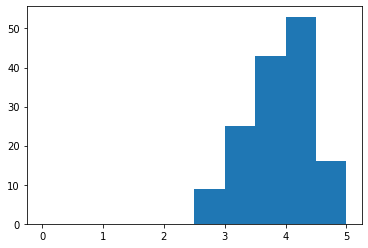

In [20]:
# Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax
fig, ax = plt.subplots()

# Generate a histogram from the values in the column using a range of 0 to 5
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))

# Display the plot
plt.show()

## 5.Comparing histograms

If you recall, one of the questions we were looking to answer was:

- What percent of the ratings are contained in the 2.0 to 4.0 range?

We can visually examine the proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on Fandango fall in this range. We can increase the number of bins from 10 to 20 for improved resolution of the distribution. The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). The `bins` parameter for `Axes.hist()` is the 2nd positional parameter, but can also be specified as a named parameter:

```
# Either of these will work.
ax.hist(norm_reviews['Fandango_Ratingvalue'], 20, range=(0, 5))
ax.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
```

Let's now generate histograms using 20 bins for all four columns. To ensure that the scales for the y-axis are the same for all histograms, let's set them manually using `Axes.set_ylim()`.



## 6.Quartiles

## 7.Box Plot

## 8.Multiple Box Plots